# Project Linear Regression: Boston House Price Prediction


-------------------------------
## Problem Statement
-------------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centers
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars

### Let us start by importing the required libraries

In [39]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

# import visualanalysis library ( Jose Medina )
#importing visualanalysis from pandas_visual_analysis library
from pandas_visual_analysis import VisualAnalysis

import warnings
warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy.stats import shapiro

### Read the dataset

In [33]:
df = pd.read_csv("Boston.csv")
df.sample(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,21.32,19.1
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,17.73,15.2
177,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,6.29,24.6
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,28.28,10.5
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,6.57,21.9
171,2.31390,0.0,19.58,0,0.605,5.880,97.3,2.3887,5,403,14.7,12.03,19.1
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,13.59,24.5
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,18.13,14.1
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,18.66,19.5
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,7.26,43.1


**Observations**
* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Get information about the dataset using the info() method

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

### Let's now check the summary statistics of this dataset

In [4]:
#write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


CRIM
Skew : 5.22
Mean: 3.61 | Median: 0.25651 | 2nd Qrt: 0.08204499999999999 | 3rd Qrt: 3.6770825
Stdev: 8.6
p-value: 0.0, stat: 0.45 and probably NOT Gaussian 


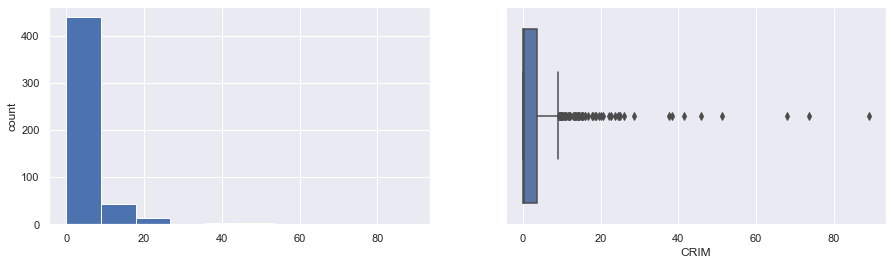

ZN
Skew : 2.23
Mean: 11.36 | Median: 0.0 | 2nd Qrt: 0.0 | 3rd Qrt: 12.5
Stdev: 23.32
p-value: 0.0, stat: 0.556 and probably NOT Gaussian 


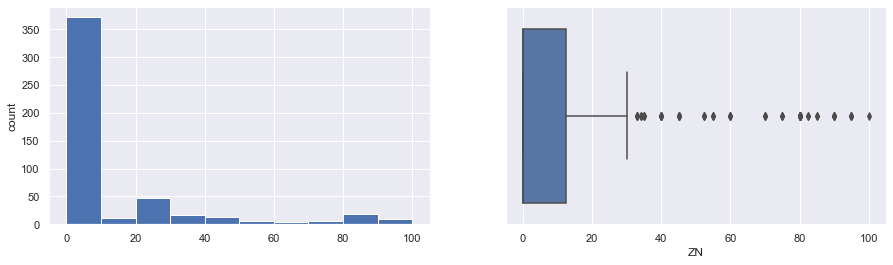

INDUS
Skew : 0.3
Mean: 11.14 | Median: 9.69 | 2nd Qrt: 5.19 | 3rd Qrt: 18.1
Stdev: 6.86
p-value: 0.0, stat: 0.9 and probably NOT Gaussian 


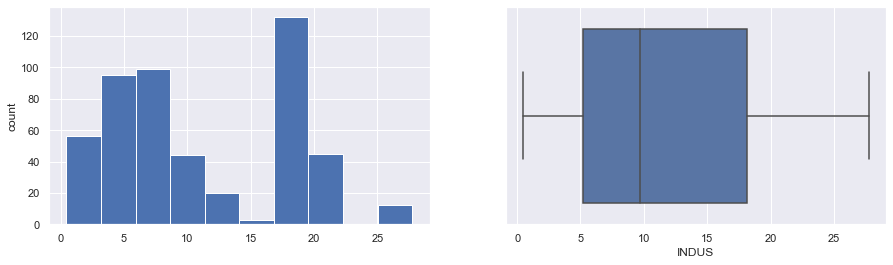

CHAS
Skew : 3.41
Mean: 0.07 | Median: 0.0 | 2nd Qrt: 0.0 | 3rd Qrt: 0.0
Stdev: 0.25
p-value: 0.0, stat: 0.275 and probably NOT Gaussian 


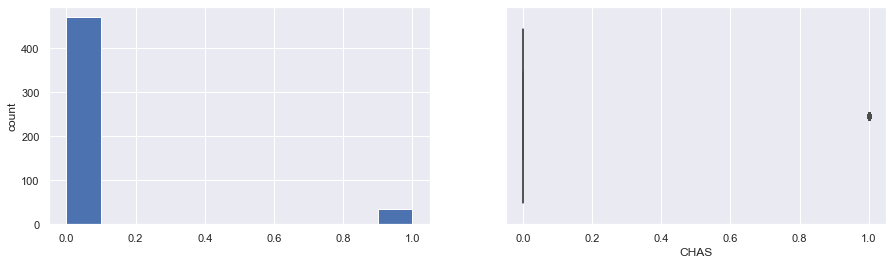

NOX
Skew : 0.73
Mean: 0.55 | Median: 0.538 | 2nd Qrt: 0.449 | 3rd Qrt: 0.624
Stdev: 0.12
p-value: 0.0, stat: 0.936 and probably NOT Gaussian 


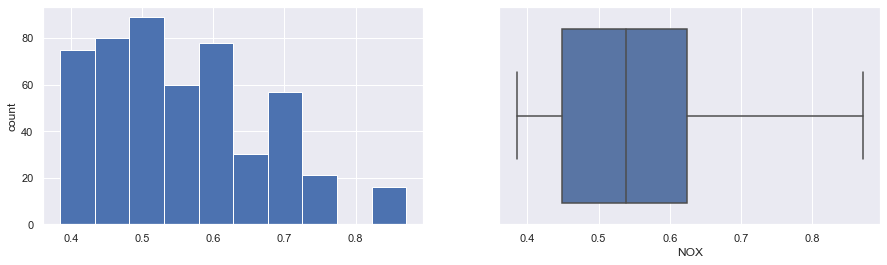

RM
Skew : 0.4
Mean: 6.28 | Median: 6.2085 | 2nd Qrt: 5.8854999999999995 | 3rd Qrt: 6.6235
Stdev: 0.7
p-value: 0.0, stat: 0.961 and probably NOT Gaussian 


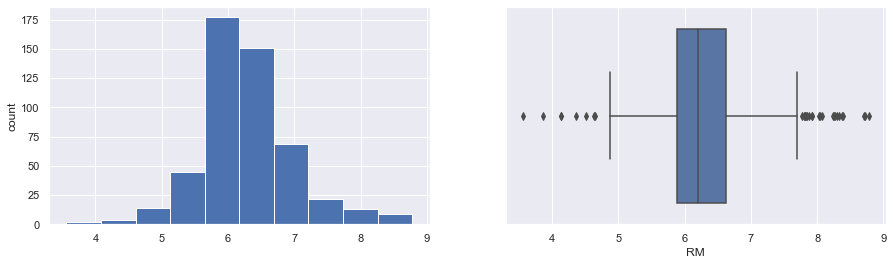

AGE
Skew : -0.6
Mean: 68.57 | Median: 77.5 | 2nd Qrt: 45.025 | 3rd Qrt: 94.07499999999999
Stdev: 28.15
p-value: 0.0, stat: 0.892 and probably NOT Gaussian 


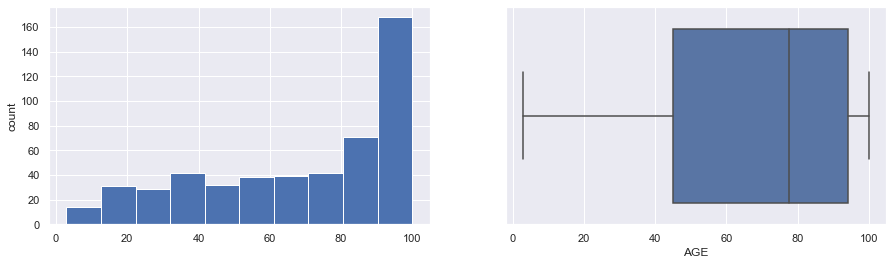

DIS
Skew : 1.01
Mean: 3.8 | Median: 3.2074499999999997 | 2nd Qrt: 2.100175 | 3rd Qrt: 5.1884250000000005
Stdev: 2.11
p-value: 0.0, stat: 0.903 and probably NOT Gaussian 


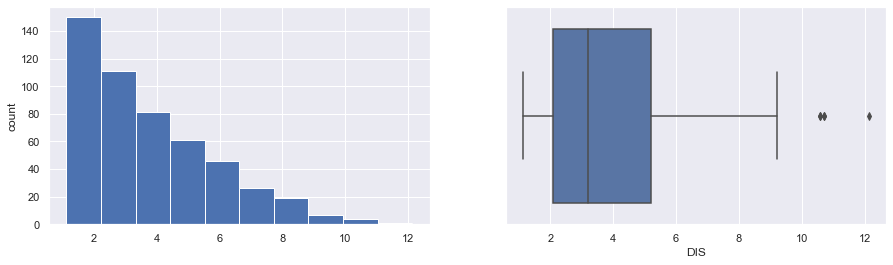

RAD
Skew : 1.0
Mean: 9.55 | Median: 5.0 | 2nd Qrt: 4.0 | 3rd Qrt: 24.0
Stdev: 8.71
p-value: 0.0, stat: 0.68 and probably NOT Gaussian 


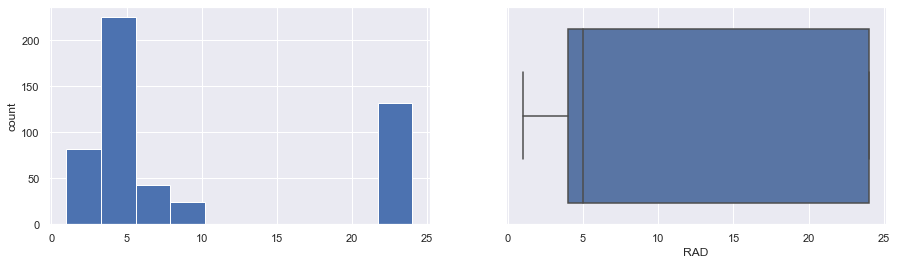

TAX
Skew : 0.67
Mean: 408.24 | Median: 330.0 | 2nd Qrt: 279.0 | 3rd Qrt: 666.0
Stdev: 168.54
p-value: 0.0, stat: 0.815 and probably NOT Gaussian 


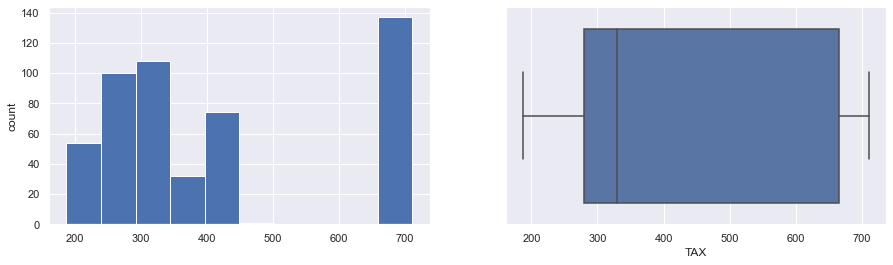

PTRATIO
Skew : -0.8
Mean: 18.46 | Median: 19.05 | 2nd Qrt: 17.4 | 3rd Qrt: 20.2
Stdev: 2.16
p-value: 0.0, stat: 0.904 and probably NOT Gaussian 


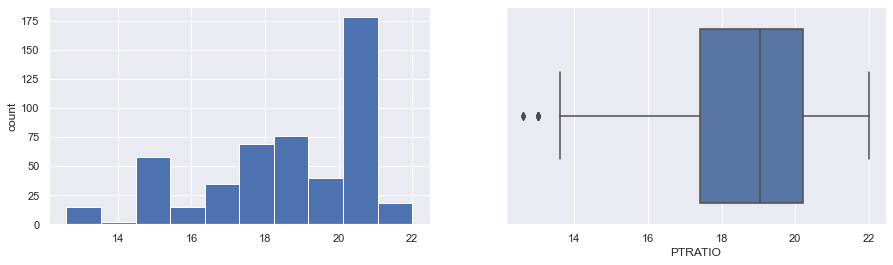

LSTAT
Skew : 0.91
Mean: 12.65 | Median: 11.36 | 2nd Qrt: 6.949999999999999 | 3rd Qrt: 16.955000000000002
Stdev: 7.14
p-value: 0.0, stat: 0.937 and probably NOT Gaussian 


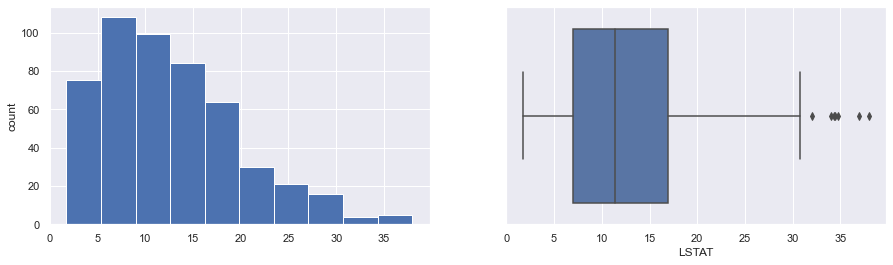

MEDV
Skew : 1.11
Mean: 22.53 | Median: 21.2 | 2nd Qrt: 17.025 | 3rd Qrt: 25.0
Stdev: 9.2
p-value: 0.0, stat: 0.917 and probably NOT Gaussian 


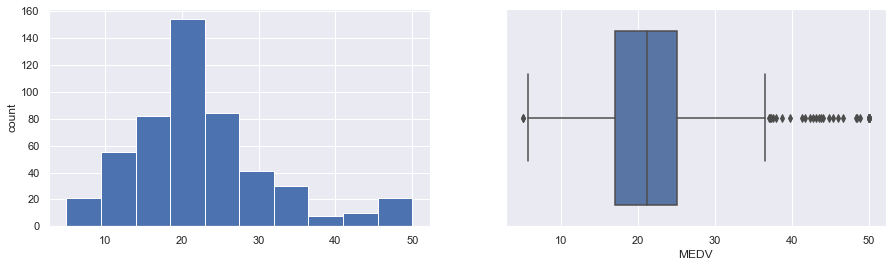

In [41]:
# Uncomment and complete the code by filling the blanks 

def fn_guassian(dataIN):
    
    stat, p = shapiro(dataIN)
    stat = round(stat,3)
    p = round(p,3)
    normtxt = 'probably NOT Gaussian'
    if p > .05:
        normtxt = 'probably Gaussian'
    print(f'p-value: {p}, stat: {stat} and {normtxt} ')


for col in df.columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist()
    print(f'Mean: {round(df[col].mean(),2)} | Median: {df[col].median()} | 2nd Qrt: {df[col].quantile(0.25)} | 3rd Qrt: {df[col].quantile(0.75)}')
    print(f'Stdev: {round(df[col].std(),2)}')
    
    fn_guassian(df[col])
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

**Observations:____**

Jose Medina Observations:
- **CRIM:**     per capita crime rate by town
> - CRIM is highly skewed right - with most values close to zero - and many outliers where crime is higher than general population. This may suggest we need to handle crime as a factor differently in our modelling.

- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
> - ZN is also highly skewed right - also with quite a few outliers. We'll have to be mindful of these outliers when we're handling modelling

- **INDUS:**    proportion of non-retail business acres per town
> - INDUS appears to have almost two separate distributions (bi-modal) within - one that appears nearly normal on the lower end of spectrum (0->10) and another populatuion (between 15->25)

- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
> - CHAS has a binomial distribution - most locations are not at the bounds of the river. Again, we may wish to explore how this river factor affects value by analyzing separately.

- **NOX:**      nitric oxides concentration (parts per 10 million)
> - NOX has a fairly uniform representation  - with a median of 6.2 and mean of 6.28. Most Nox values are concentrated in less than 0.6. No outliers.

- **RM:**       average number of rooms per dwelling
> - RM - this distribution looks approximately normal - with outliers on both the lower and upper spectrum. Median rooms = 6.2, mean of 6.28, and stdev of 0.7 (not a ton of variation). 

- **AGE:**     proportion of owner-occupied units built before 1940
> - A large proportion (median of 77.5%) of homes were build before 1940 and mean of 68.57.

- **DIS:**      weighted distances to five Boston employment centers
> - DIS: There is a strong right skew, suggesting that proximity to employment centers is valued (makes sense). The boxplot IQR indiciates ~75% of the population lives less than 5.18 miles from a boston employment center. There are a few outliers that live further.

- **RAD:**      index of accessibility to radial highways
> - There appear to be two distributions (bi-modal) represented - one with an accessibility of approxiately an average fo 5+ (but less than 10), and another > 20. We'll have to be careful with these bi-forcated distributions.

- **TAX:**      full-value property-tax rate per 10,000 dollars
> - There again appears to be a bi-modal distribution - with one that is apprxoimately normal in tax rates < 450 and another set of properties > 650

- **PTRATIO:**  pupil-teacher ratio by town
> - With a mean of 18.46 and median of 19.05 of pupil-teacher ration - there appears to be a few tons with a much higher ration (>20).

- **LSTAT:**    %lower status of the population
> - Slightly skewed right, with a mean of 12.65 and median of 11.36. Boxplot show that there are a few outliers on the high end of the distribution

- **MEDV:**     Median value of owner-occupied homes in 1000 dollars
> Median value is 21.2K and a mean of 22.53. Because on the high end, there are outlier, the mean is slightly skewed. We'll have to be mindful of this in modelling.


Before performing the modeling, it is important to check the univariate distribution of the variables.

### Univariate Analysis

### Check the distribution of the variables

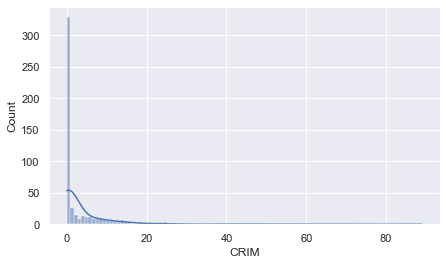

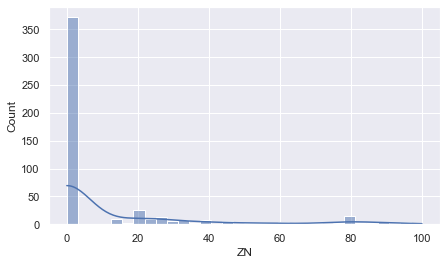

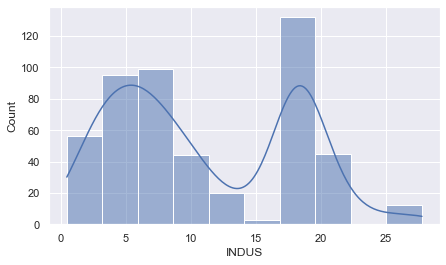

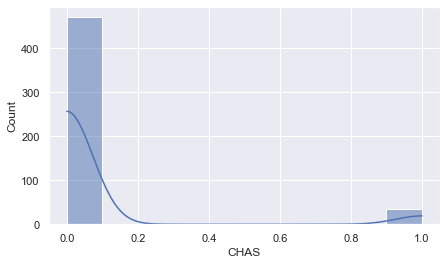

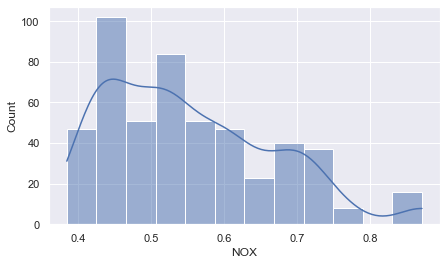

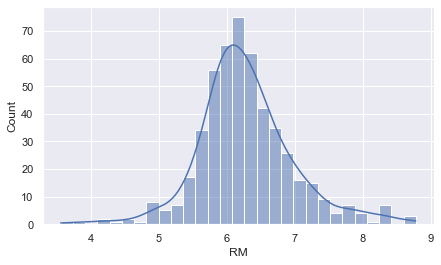

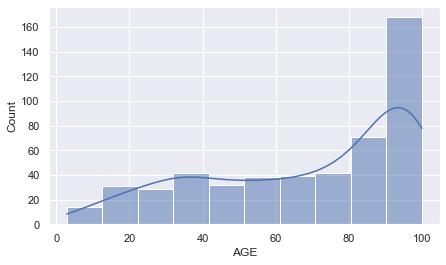

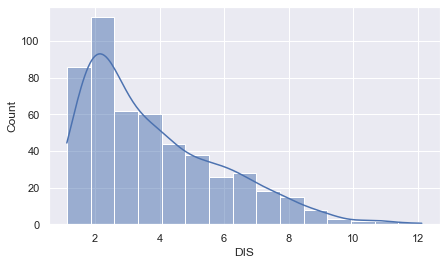

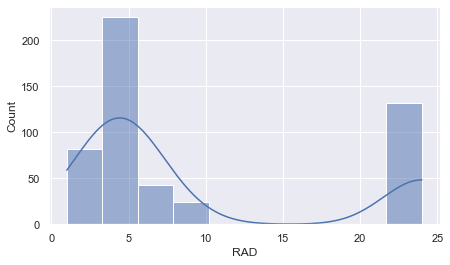

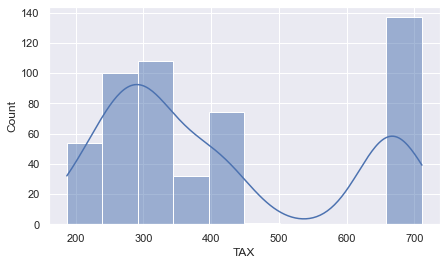

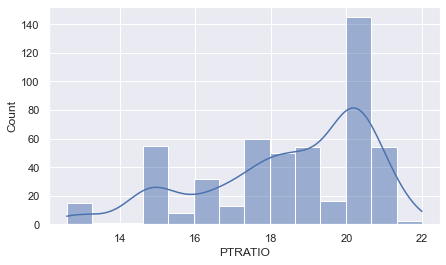

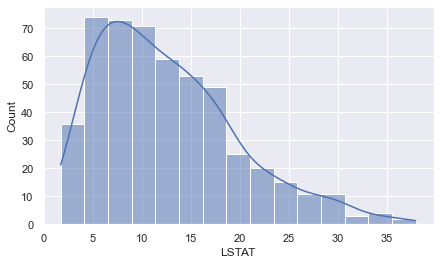

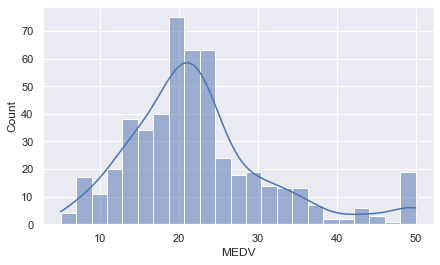

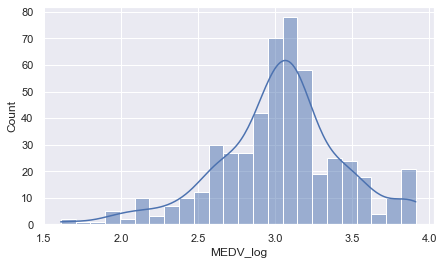

In [50]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

**Observations**

Jose Medina Observations 

* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [51]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

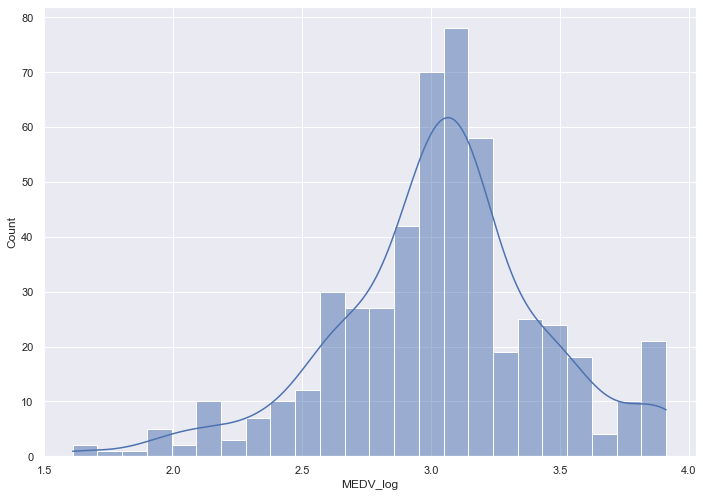

In [52]:
sns.histplot(data=df, x='MEDV_log', kde = True)

**Observations**
* The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### Bivariate Analysis

#### Let's check the correlation using the heatmap 

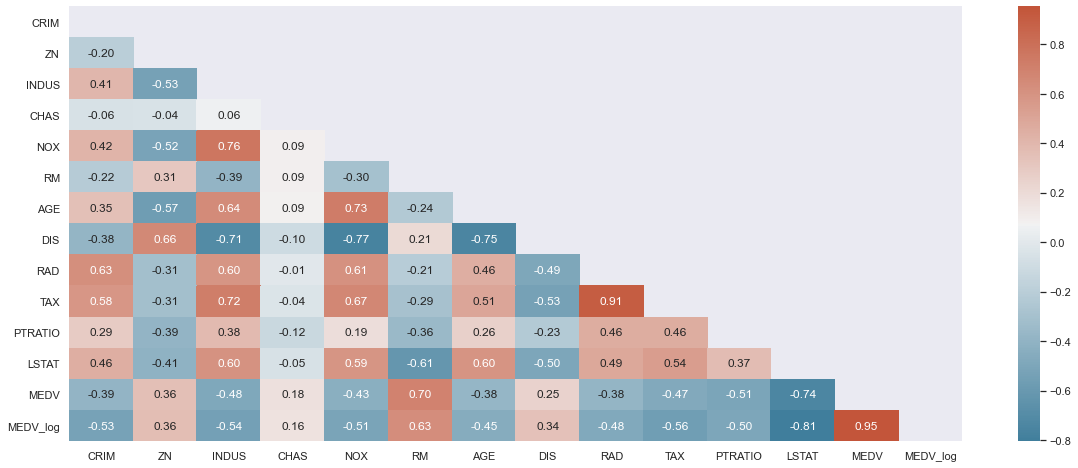

In [74]:
plt.figure(figsize=(20,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(data=corr,annot=True,fmt='.2f',cmap=cmap, mask=matrix ) 
plt.show()

In [76]:
c = df.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
temp = pd.DataFrame(so).reset_index()
temp.columns = ['Factor1','Factor2','Corr']
temp = temp[(temp['Corr']>=.7) | (temp['Corr']<= -.7)]

pd.pivot_table(temp, index=['Factor1'], columns=['Factor2'], values=['Corr'], aggfunc=['mean']).fillna('')


mean                                                    \
              Corr                                                     
Factor2        AGE CHAS CRIM       DIS     INDUS     LSTAT      MEDV   
Factor1                                                                
AGE            1.0           -0.747881                                 
CHAS                1.0                                                
CRIM                     1.0                                           
DIS      -0.747881                 1.0 -0.708027                       
INDUS                        -0.708027       1.0                       
LSTAT                                                  1.0 -0.737663   
MEDV                                             -0.737663       1.0   
MEDV_log                                         -0.805034  0.953155   
NOX        0.73147            -0.76923  0.763651                       
PTRATIO                                                                
RAD                                                                    
RM                                                                     
TAX                                      0.72076                       
ZN                                                                     

                                                                    
                                                                    
Factor2   MEDV_log       NOX PTRATIO       RAD   RM       TAX   ZN  
Factor1                                                             
AGE                  0.73147                                        
CHAS                                                                
CRIM                                                                
DIS                 -0.76923                                        
INDUS               0.763651                          0.72076       
LSTAT    -0.805034                                                  
MEDV      0.953155                                                  
MEDV_log       1.0                                                  
NOX                      1.0                                        
PTRATIO                          1.0                                
RAD                                        1.0       0.910228       
RM                                              1.0                 
TAX                                   0.910228            1.0       
ZN                                                             1.0

**Observations:______**

Jose Medina Observations

Several factors are inversely related to MEDV_log value, including CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO, and LSTATE. **The most noteworthy are:**
> - CRIM & MEDV_log: Crime is inversely ralted to the MEDV_log (value of homes) (higher the crime, lower the value)
> - LSTAT & MEDV_log: %lower status of the population is highly inversely correlated to MEDV_log home values (more lower status means lower value MEDV_log)
> - Distance and age are inversely related - homes closest to Boston Employment centers are older

Several factors are positively correlated to MED_log value, including RM, DIS, and ZN. **The most noteworthy are:***
> - RM & MEDV_log: higher average of rooms is positively correlated to value of home
> - ZN & MEDV_log: the more land zoned for large lots, the more likely the value is high (these two factors may actually be confounded)
> - Nox and Industry are positively correlated (makes sense)
> - Tax and RAD (access to radial highways) is also highly correlated

Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7) 

R2:0.76, p-value:0.0


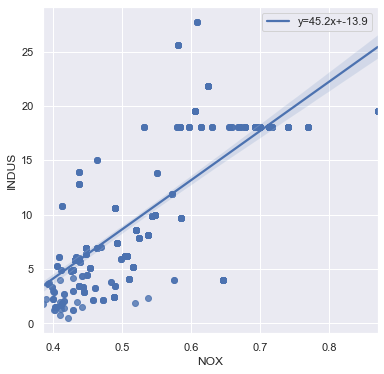

In [88]:
# scatterplot to visualize the relationship between NOX and INDUS
x = 'NOX'
y = 'INDUS'

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])

plt.figure(figsize=(6, 6))

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=y, data=df, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

print(f'R2:{round(r_value,2)}, p-value:{round(p_value,3)}')
plt.show()


**Observations:____**

Jose Medina Observations 

> - Here we see a positive relationship between the two factors
> - As the concentration of INDUSTRY increases, so too does NOX levels (which corresponds naturally to industrial activity)
> - The fit appears decent with a high R2 (76%) and a p-value of 0 (significant) - but we see a clear pattern of fitting two clusters of data - a grouping near NOX and INDUS on the lower range, and some sparseness on the higher end. We'd need to look at this closely to guard against heteroskedasiticty in the residuals (we'd need to inspect that separately)

R2:0.73, p-value:0.0


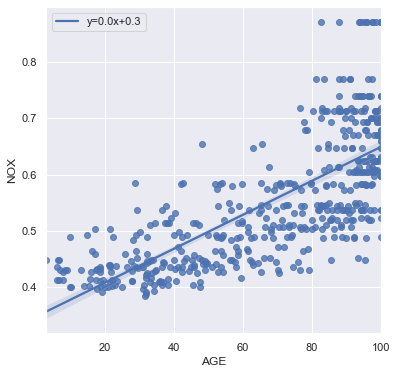

In [89]:
# scatterplot to visualize the relationship between AGE and NOX
x = 'AGE'
y = 'NOX'

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])

plt.figure(figsize=(6, 6))

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=y, data=df, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

print(f'R2:{round(r_value,2)}, p-value:{round(p_value,3)}')
plt.show()


**Observations:____**

Jose Medina Observations 

> - Here we see a positive relationship between the two factors
> - As HOME age increases, we see that NOX levels increase. This is because we saw earlier that OLDER homes are placed more closely to employment/busy centers, which is also correlated to higher NOX.
> - With an R2 of 73%, and p-value 0, we see another strong model - however, we see some fanning of the values on the higher range which most likely will lead to some heteroskedasiticity - which could make the model less useful on the higher range of AGE.

R2:-0.77, p-value:0.0


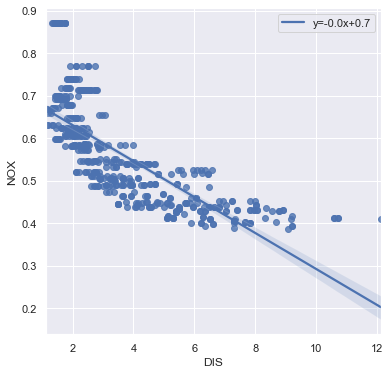

In [91]:
# scatterplot to visualize the relationship between DIS and NOX
x = 'DIS'
y = 'NOX'

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df[x],df[y])

plt.figure(figsize=(6, 6))

# use line_kws to set line label for legend
ax = sns.regplot(x=x, y=y, data=df, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

print(f'R2:{round(r_value,2)}, p-value:{round(p_value,3)}')
plt.show()

**Observations:___**

Jose Medina Observations 

> - Here we see an relationship between the two factors
> - As DIS increases, we see that NOX levels increase (away from employment centers)
> - The fit appears decent with a high R2 (77%) and a p-value of 0 (significant). We see some curvature in the scatter plot which suggests the relationship might have a higher order (perhaps quadratic). If we plotted the residuals, we'd see some errors in the middle of the range that would hurt the usefulnees of our regression.

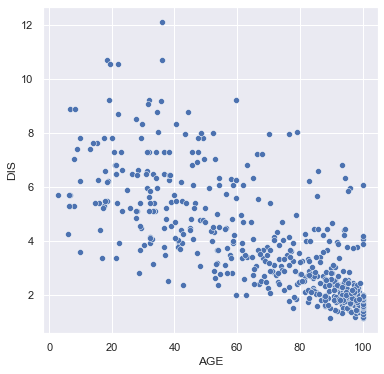

In [92]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

**Observations:**
* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

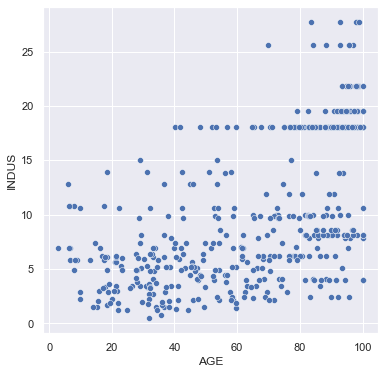

In [93]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

**Observations:**
* No trend between the two variables is visible in the above plot.

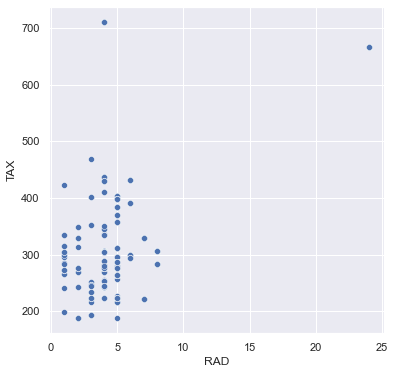

In [94]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

**Observations:**
* The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

Let's check the correlation after removing the outliers.

In [95]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.249757313314292


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

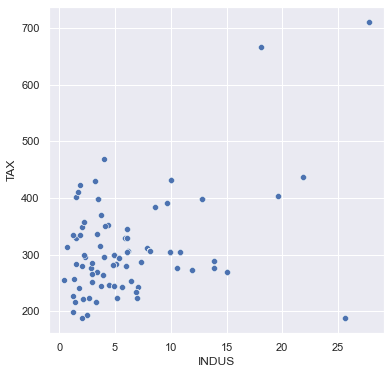

In [97]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

**Observations:**
* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

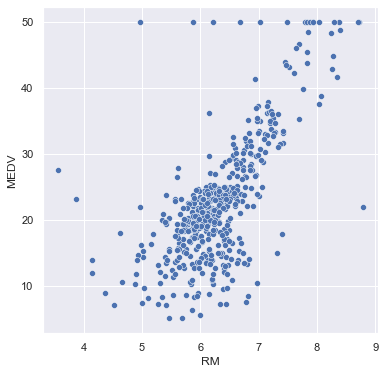

In [98]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

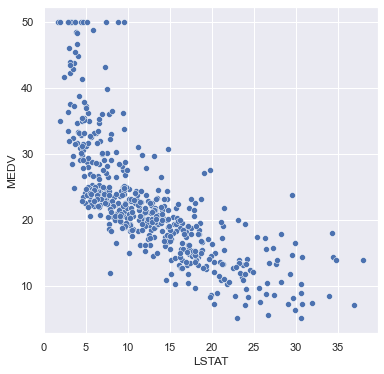

In [99]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [100]:
# separate the dependent and independent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [101]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Next, we will check the multicollinearity in the train dataset.

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [103]:
# create the model after dropping TAX
X_train = X_train.drop(columns=['TAX'])

# check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

#### **Question 5:** Write the code to create the linear regression model and print the model summary. Write your observations from the model. (3 Marks)

In [116]:
# create the model
model1 = sm.OLS(y_train, X_train)
model1 = model1.fit()
# get the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          1.40e-101
Time:                        18:27:36   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

**Observations:_____**

Jose Medina Observations 

> - We can see that R-squared for the model is 0.769.
> - When we inspect the list of variables and p-values, we see that ZN, INDUS, and AGE have a p-values >0.05. We should drop these variable as they are not statistically significant. 
> - The condition number is very large - there might be strong multi-collinearity, but let's see if by dropping NOX we can solve that in the next section.

#### **Question 6:** Drop insignificant variables from the above model and create the regression model again. (2 Marks)

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [118]:
# create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns=['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS']) #write your code here
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train, X_train)
model2 = model2.fit()
# get the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 05 Sep 2021   Prob (F-statistic):          2.61e-104
Time:                        06:59:51   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

**Observations:**
* We can see that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

#### Check for mean residuals

Mean of residuals is :-1.549921521948453e-15


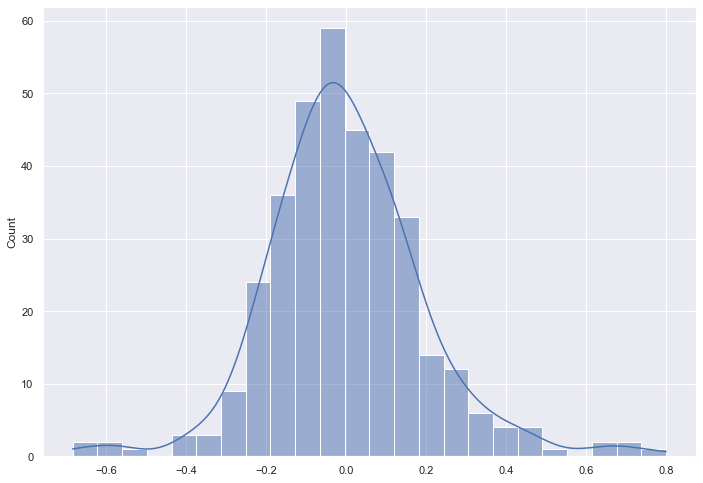

In [123]:
residuals = model2.resid
print(f'Mean of residuals is :{residuals.mean()}')
sns.histplot(residuals, kde=True)
plt.show()

**Observations:____**

> Jose Medina observations:
> - The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

#### Check for homoscedasticity

* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [120]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [124]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425279), ('p-value', 0.3019012006766915)]

**Observations:____**

> Jose Medina Observations
> - As we can see from the above test the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means - residuals ***are homoscedastic***.

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

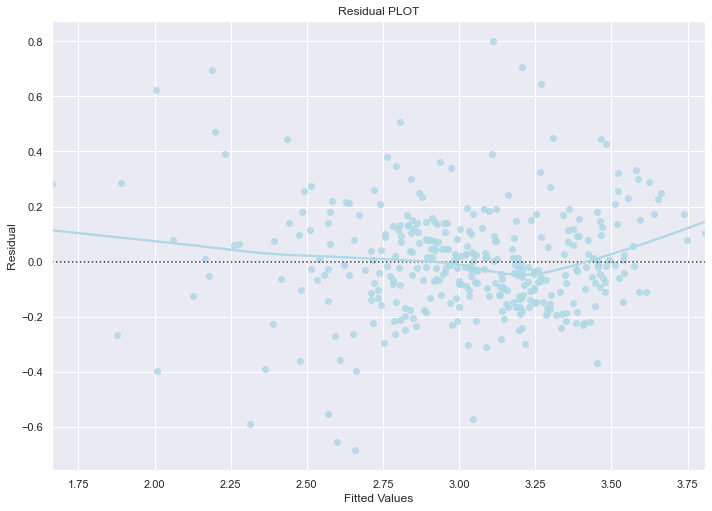

In [126]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observations:_____**

> Jose Medina Observations:
> - We can see that there is no pattern in the residuals vs fitted values scatter plot
> - Therefore, the **linearity assumption is satisfied.**


#### Normality of error terms
The residuals should be normally distributed.

Mean of residuals is :-1.549921521948453e-15


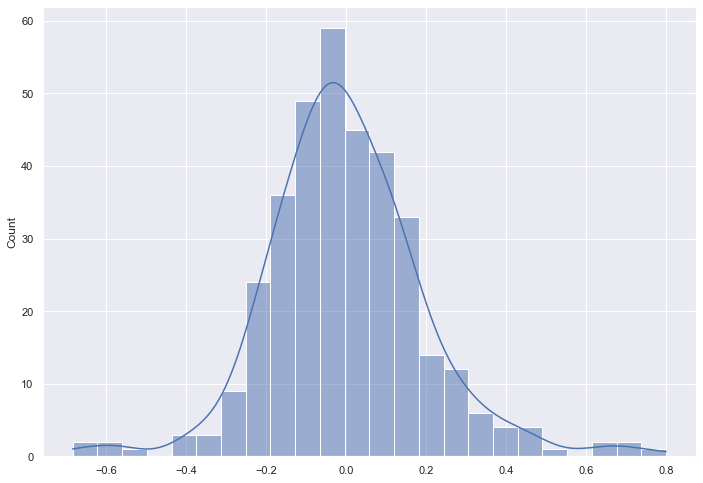

In [132]:
print(f'Mean of residuals is :{residuals.mean()}')
sns.histplot(residuals, kde=True)
plt.show()

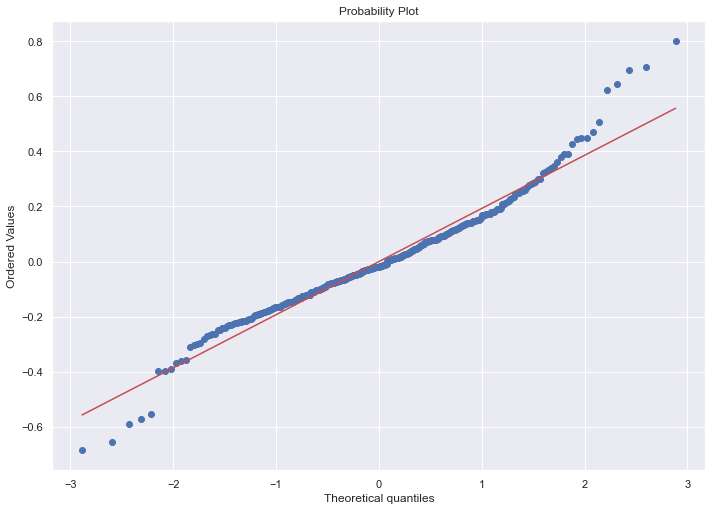

In [128]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations:_____**

> Jose Medina Observations
> - Both the histogram and the q-q plot help confirm the residuals are **normally distributed** which satisfies another assumption of the linear regression model.

### Check the performance of the model on the train and test data set

In [129]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:____**

> Jose Medina Observations
> - Root Mean Squared Error of train and test data is not materially different, indicating that our model is not overfitting the train data.
> - Mean Absolute Error indicates that our current model is able to predict values within mean error of 15.1% on test data.
> - Mean Absolute Percentage Error is ~5.257% on the test data.

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

In [130]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                     


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**
- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

In [135]:
coef = model2.params

In [137]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = '\n ')

log (Price) =	( 4.649385823266638 ) *  const +
 ( -0.012500455079103887 ) *  CRIM +
 ( 0.1197731907701965 ) *  CHAS +
 ( -1.0562253516683255 ) *  NOX +
 ( 0.058906575109279824 ) *  RM +
 ( -0.044068890799405055 ) *  DIS +
 ( 0.00784847460624381 ) *  RAD +
 ( -0.048503620794999 ) *  PTRATIO +
 ( -0.029277040479796866 ) *  LSTAT +
 

> Jose Medina Conclusions
> - Performed univariate and bivariate analysis 
> - Iteratively built the model
      - Checked for different assumptions of linear regression
      - Fixed the model for any violated assumptions
      - Dropped features that were NOT significant
      - Evaluated the model using evaluation metrics


Original objective:
- predict the housing prices of a town or a suburb based on the features of the locality provided to us. 
- identify the most important features in the dataset.

> Jose Medina Recommendation
> - we can see from the regression equation that with 
    - one unit change in RM, price increases .0589
    - one unit change in CHAS ( a 1 vs. a 0), price increases .119 (tract bound by river)
    - one unit change in NOX, price decreases by -1.05 (closer to industry / polution)
    - one unit change in PTRATIO, price decreases by -.0485 (more crowded classrooms, more students to every teacher)

Recommend users of models could monitor these factors and others in the model to understand impact on home values. Would also recommend exploring higher order models and there could be higher order relationships in the data that might explain outcomes more accurately (i.e. perhaps achieving a higher R2)